# Tutorial - Marques-Pita Canalization

The example from the Marques-Pita & Rocha (2013) paper.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import networkx as nx
import pandas as pd
#pd.set_option('display.unicode.east_asian_width', False)
#pd.set_option('display.unicode.ambiguous_as_wide', False)
pd.set_option('display.width',200)
import cana
from cana.datasets.bio import MARQUESPITA
from cana.drawing.canalizing_map import draw_canalizing_map_graphviz
import matplotlib.pylab as plt
from IPython.display import Image, display

In [4]:
Image(url="http://journals.plos.org/plosone/article/figure/image?size=large&id=info:doi/10.1371/journal.pone.0055946.g005",width=350)

## Marques-Pita Network

In [6]:
net = MARQUESPITA()
print(net)

<BNetwork(Name='Marques-Pita & Rocha', N=7, Nodes=['One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven'])>


In [5]:
n = MARQUESPITA().nodes[6]
print( n.outputs)
print( n)
print( 'k_r: %.2f - %.2f' % (n.input_redundancy(mode='node',bound='upper',norm=False), n.input_redundancy(mode='node',bound='lower',norm=False)))
print( 'k_e: %.2f - %.2f' % (n.effective_connectivity(mode='node',bound='upper',norm=False), n.effective_connectivity(mode='node',bound='lower',norm=False)))
print('k_s: %.2f - %.2f' % (n.input_symmetry(mode='node',bound='upper',norm=False), n.input_symmetry(mode='node',bound='lower',norm=False)))
print()

print('k_r: %s (upper)' % n.input_redundancy(mode='input',bound='upper'))
print( 'k_e: %s (upper)' % n.input_redundancy(mode='input',bound='upper'))
print() 
dfLUT, dfPI, dfTW = n.look_up_table(), n.schemata_look_up_table(type='pi'), n.schemata_look_up_table(type='ts')
print( display(pd.concat({'Original LUT':dfLUT,'PI Schema':dfPI,'TW Schema':dfTW}, axis=1).fillna('-')))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
<BNode(name='Seven', k=6, inputs=[One,Two,Three,Four,Five,Six], state=0, outputs='[0,0,0,0...0,0,0,0]' constant=False)>
k_r: 4.25 - 3.97
k_e: 1.75 - 2.03
k_s: 4.19 - 2.55

k_r: [0.9375, 0.5625, 0.5625, 0.9375, 0.9375, 0.9375] (upper)
k_e: [0.9375, 0.5625, 0.5625, 0.9375, 0.9375, 0.9375] (upper)



Original LUT      PI Schema        TW Schema     
            In: Out:       In: Out:         In: Out:
0        000000    0    1##111    0      1##111    0
1        000001    0    0##000    0      0##000    0
2        000010    0    ##0###    0      ##0###    0
3        000011    0    #1####    0      #1####    0
4        000100    0    001##1    1  0̊01#̊#̊1̊    1
5        000101    0    0011##    1           -    -
6        000110    0    101##0    1           -    -
7        000111    0    101#0#    1           -    -
8        001000    0    #010#1    1           -    -
9        001001    1    #0101#    1           -    -
10       001010    1    001#1#    1           -    -
11       001011    1    #011#0    1           -    -
12       001100    1    #0110#    1           -    -
13       001101    1    #01#10    1           -    -
14       001110    1    #01#01    1           -    -
15       001111    1    1010##    1           -    -
16       010000    0         -    -           -    -
17       010001    0         -    -           -    -
18       010010    0         -    -           -    -
19       010011    0         -    -           -    -
20       010100    0         -    -           -    -
21       010101    0         -    -           -    -
22       010110    0         -    -           -    -
23       010111    0         -    -           -    -
24       011000    0         -    -           -    -
25       011001    0         -    -           -    -
26       011010    0         -    -           -    -
27       011011    0         -    -           -    -
28       011100    0         -    -           -    -
29       011101    0         -    -           -    -
30       011110    0         -    -           -    -
31       011111    0         -    -           -    -
32       100000    0         -    -           -    -
33       100001    0         -    -           -    -
34       100010    0         -    -           -    -
35       100011    0         -    -           -    -

None


In [15]:
Image(url="http://journals.plos.org/plosone/article/figure/image?size=large&id=10.1371/journal.pone.0055946.g010",width=350)

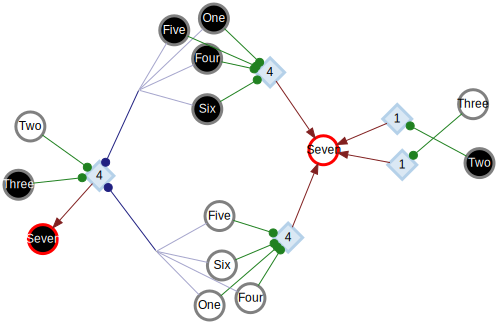

In [8]:
draw_canalizing_map_graphviz(n.canalizing_map())